In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Online_Retail = pd.read_csv('D:/Documents/All Datasets/datascienceinternshipprojects/OnlineRetail (1) (1)')

In [3]:
Online_Retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
Online_Retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
Online_Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
Online_Retail.shape

(541909, 8)

In [7]:
pd.isnull(Online_Retail).any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [8]:
# Find out the number of null values in each column
null_counts = Online_Retail.isnull().sum()

# Display the number of null values in each column
print(null_counts)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
# Drop rows with missing CustomerID
Online_Retail = Online_Retail.dropna(subset=['CustomerID'])

In [10]:
pd.isnull(Online_Retail).any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [15]:
# Convert InvoiceDate to datetime
Online_Retail.loc[:, 'InvoiceDate'] = pd.to_datetime(Online_Retail['InvoiceDate'])

In [16]:
# Convert CustomerID to int for consistency
Online_Retail.loc[:, 'CustomerID'] = Online_Retail['CustomerID'].astype(int)

In [17]:
Online_Retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


In [18]:
# Create a pivot table to analyze the data
pivot_table = Online_Retail.pivot_table(index='StockCode', values='Quantity', aggfunc='sum')

In [21]:
# Reset the index to create a DataFrame with separate columns
pivot_df = pivot_table.reset_index()

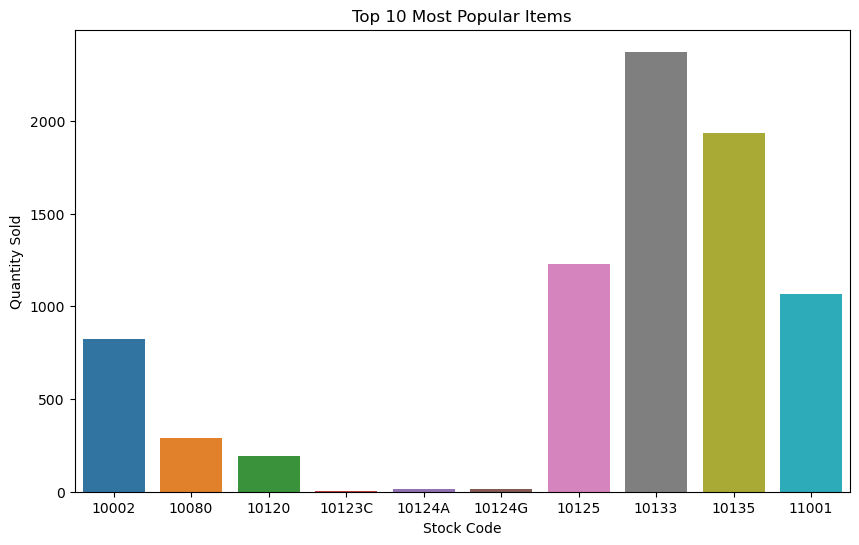

In [22]:
# Visualize the top 10 most popular items
plt.figure(figsize=(10, 6))
sns.barplot(x='StockCode', y='Quantity', data=pivot_df.head(10))
plt.title('Top 10 Most Popular Items')
plt.xlabel('Stock Code')
plt.ylabel('Quantity Sold')
plt.show()

In [29]:
# Find popular items globally
global_popular_items = pivot_table.sort_values(by='Quantity', ascending=False).head(10)
print('Global Popular Items:')
print(global_popular_items)

Global Popular Items:
           Quantity
StockCode          
84077         53215
22197         48712
85099B        45066
84879         35314
85123A        34204
21212         33409
23084         27094
22492         25880
22616         25321
21977         24163


In [35]:
# Find popular items country-wise
country_popular_items = Online_Retail.groupby('Country')['StockCode'].value_counts().head(10)
print('Country-wise Popular Items:')
print(country_popular_items)

Country-wise Popular Items:
Country    StockCode
Australia  22720        10
           20725         9
           21731         9
           22090         8
           22138         8
           22382         8
           22617         8
           22699         8
           47566         8
           84978         8
Name: count, dtype: int64


In [38]:
# Find popular items month-wise
Online_Retail['InvoiceMonth'] = Online_Retail['InvoiceDate'].dt.month
month_popular_items = Online_Retail.groupby('InvoiceMonth')['StockCode'].value_counts().head(10)
print('Month-wise Popular Items:')
print(month_popular_items)

Month-wise Popular Items:
InvoiceMonth  StockCode
1             85123A       167
              22720        137
              22423        132
              22469        121
              22457         98
              84378         97
              21733         92
              22960         91
              22722         87
              22470         86
Name: count, dtype: int64


C:\Users\aryan\AppData\Local\Temp\ipykernel_12568\3645725916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Online_Retail['InvoiceMonth'] = Online_Retail['InvoiceDate'].dt.month


In [45]:
# Function to analyze and print recommendations
def recommend_items(customer_id, num_recommendations=5):
    # Get the customer's purchase history
    customer_purchases = Online_Retail[Online_Retail['CustomerID'] == customer_id]
    
    # Get the popular items that the customer hasn't purchased yet
    recommended_items = pivot_df[~pivot_df['StockCode'].isin(customer_purchases['StockCode'])].sort_values('Quantity', ascending=False).head(num_recommendations)
    
    print(f'Recommended items for customer {customer_id}:')
    print(recommended_items)

In [46]:
# Test the recommendation function
recommend_items(17850)

Recommended items for customer 17850:
     StockCode  Quantity
2812     84077     53215
1092     22197     48712
3235    85099B     45066
3069     84879     35314
425      21212     33409
